# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [7]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(15)

%matplotlib inline

In [35]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=5,
                  center_box=(10, 1000),
                  shuffle=False) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

In [36]:
X

array([[486.6708625 , 283.49067779],
       [475.93986709, 277.92715716],
       [491.10185463, 277.99425191],
       [492.97941095, 277.79441977],
       [481.62625234, 271.93770953],
       [496.91391921, 285.2025597 ],
       [482.01436096, 285.94716065],
       [485.3070292 , 275.85909934],
       [491.68989964, 270.51536237],
       [485.34039025, 274.00246462],
       [491.91250188, 287.63193243],
       [482.78407913, 282.93968562],
       [489.82862681, 271.41015984],
       [493.15466097, 274.05606507],
       [483.23373338, 283.64076828],
       [500.80145838, 282.88785523],
       [491.6287389 , 281.77354979],
       [479.57618553, 274.40805161],
       [478.99530065, 278.97249712],
       [484.84607957, 275.36439727],
       [486.01088955, 273.94003361],
       [486.66861227, 279.67790189],
       [491.11944204, 279.39773108],
       [479.48952742, 283.18708529],
       [484.06830317, 285.16070039],
       [487.71357345, 279.20011357],
       [490.36122995, 286.40542297],
 

For n_clusters = 2 The average silhouette_score is : 0.6149022212273162 clusterer.inertia_ 22622602.126838595
For n_clusters = 3 The average silhouette_score is : 0.7273373126813418 clusterer.inertia_ 9228745.471116867
For n_clusters = 4 The average silhouette_score is : 0.828378907158028 clusterer.inertia_ 4147019.6254541855
For n_clusters = 5 The average silhouette_score is : 0.9723350675795799 clusterer.inertia_ 25277.135273769505
For n_clusters = 6 The average silhouette_score is : 0.8458168203368895 clusterer.inertia_ 23137.67584641886
For n_clusters = 7 The average silhouette_score is : 0.7175739210108443 clusterer.inertia_ 20984.832646905466
For n_clusters = 8 The average silhouette_score is : 0.5905360525561076 clusterer.inertia_ 18831.48823724354


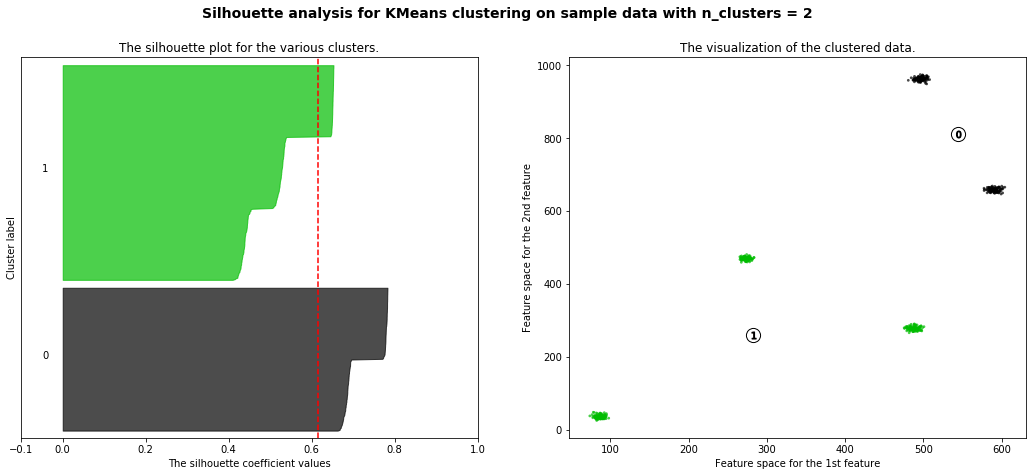

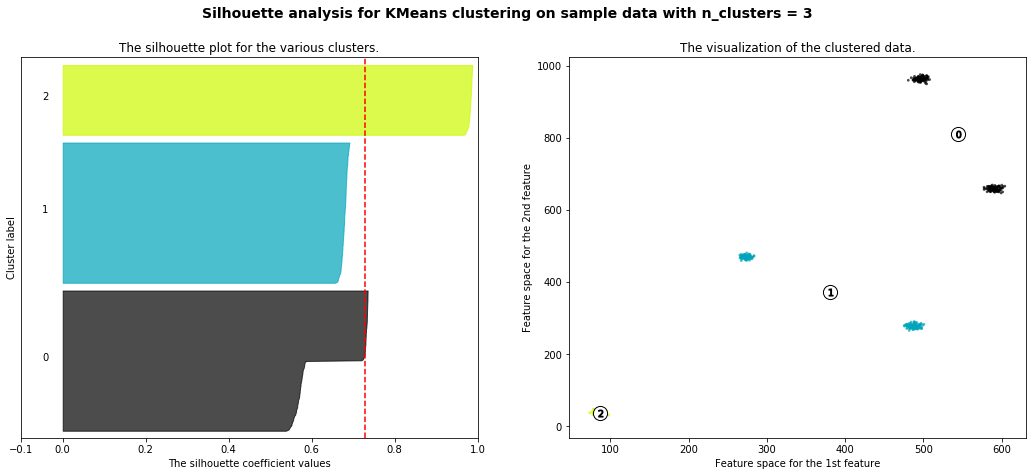

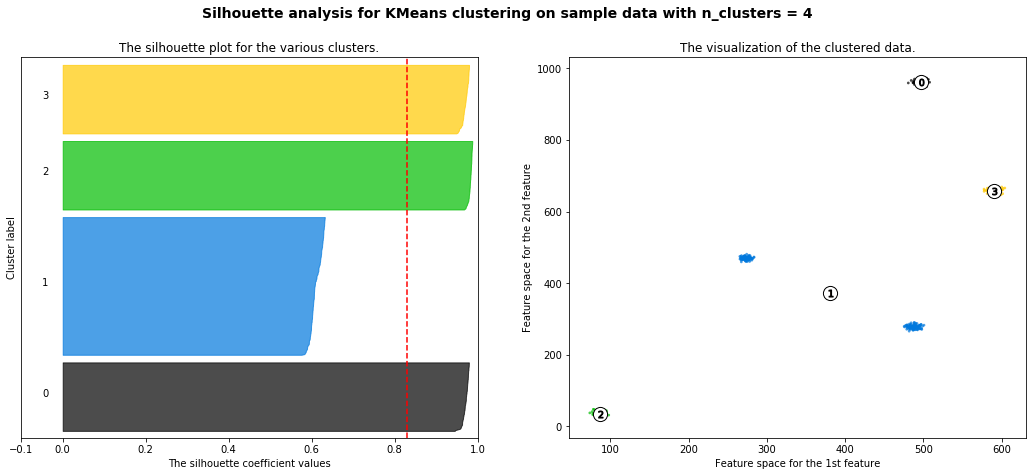

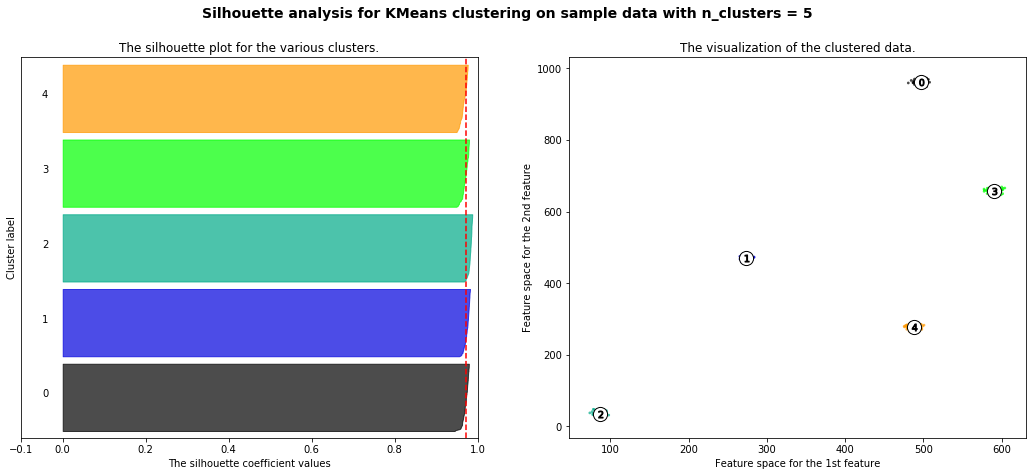

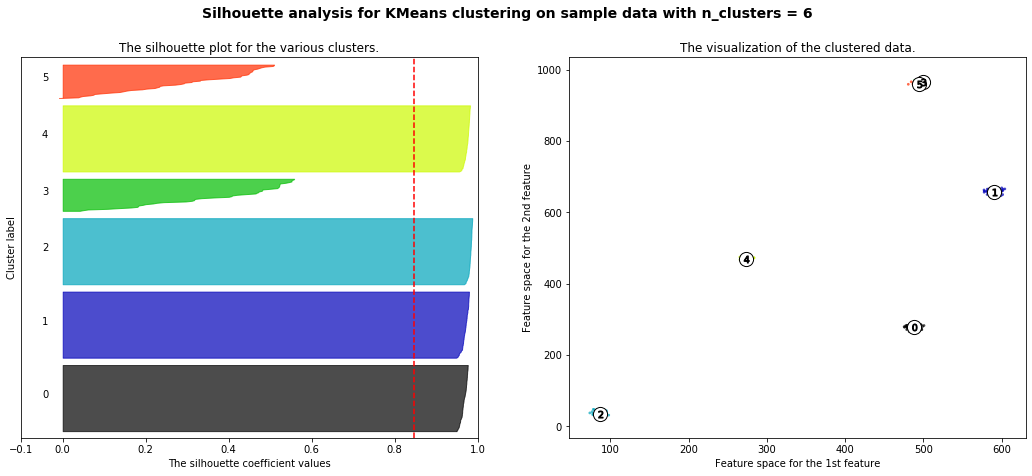

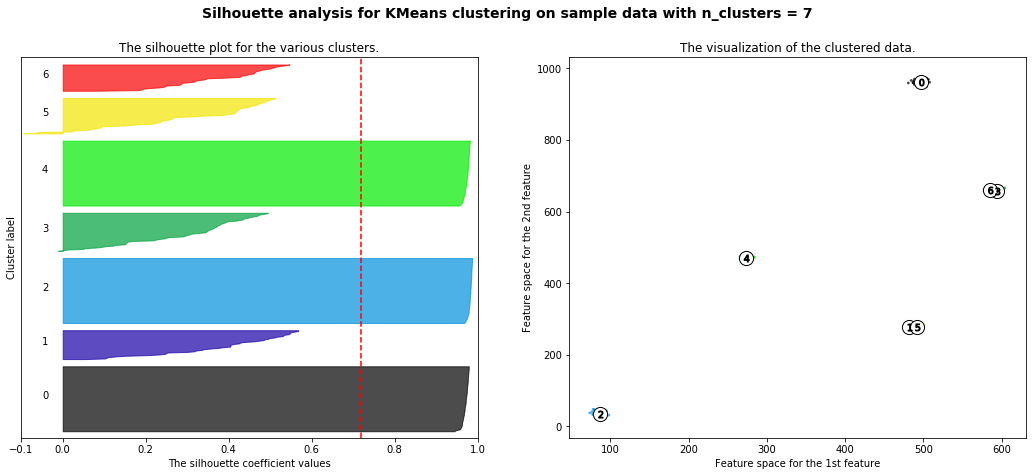

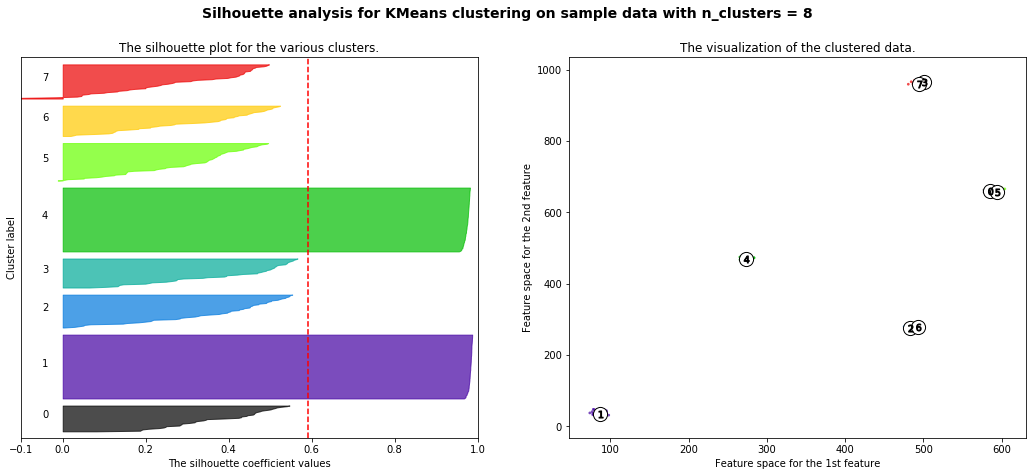

In [37]:
# 計算並繪製輪廓分析的結果
# 因下列為迴圈寫法, 無法再分拆為更小執行區塊, 請見諒
distortions = []
for n_clusters in range_n_clusters:
    # 設定小圖排版為 1 row 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 左圖為輪廓分析(Silhouette analysis), 雖然輪廓係數範圍在(-1,1)區間, 但範例中都為正值, 因此我們把顯示範圍定在(-0.1,1)之間
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 這部分是用來在不同輪廓圖間塞入空白, 讓圖形看起來更清楚
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # 宣告 KMean 分群器, 對 X 訓練並預測
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # 計算所有點的 silhouette_score 平均
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg,
         "clusterer.inertia_", clusterer.inertia_)

    # 計算所有樣本的 The silhouette_score
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # 收集集群 i 樣本的輪廓分數，並對它們進行排序
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # 在每個集群中間標上 i 的數值
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 計算下一個 y_lower 的位置
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 將 silhouette_score 平均所在位置, 畫上一條垂直線
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # 清空 y 軸的格線
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 右圖我們用來畫上每個樣本點的分群狀態, 從另一個角度觀察分群是否洽當
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # 在右圖每一群的中心處, 畫上一個圓圈並標註對應的編號
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    distortions.append(clusterer.inertia_)
plt.show()